In [1]:
import numpy as np  

Initialize the input of feature matrix.

In [2]:
def input_feature(n, k, A):
  print("Enter features of one sample row-wise: ")
  for i in range(n):
    X = [1]
    for j in range(k):
      X.append(float(input()))
    A.append(X)

Initialize the input of $y_t$ (true values) vector.

In [3]:
def input_target(n, B):
  print("Enter targets: ")
  Y = []
  for i in range(n):
    Y.append(float(input()))
  B.append(Y)

Initialize the implementation of a random weights vector. Here, the initial guess is kept as $1$ vector (vector of 1's).

In [4]:
def theta(k, Theta):
  for i in range(k+1):
    Theta.append(1)

The next three functions are quite difficult to explain by typing. Consider them as normal equations for optimizing the partial derivatives. A picture may help :-).

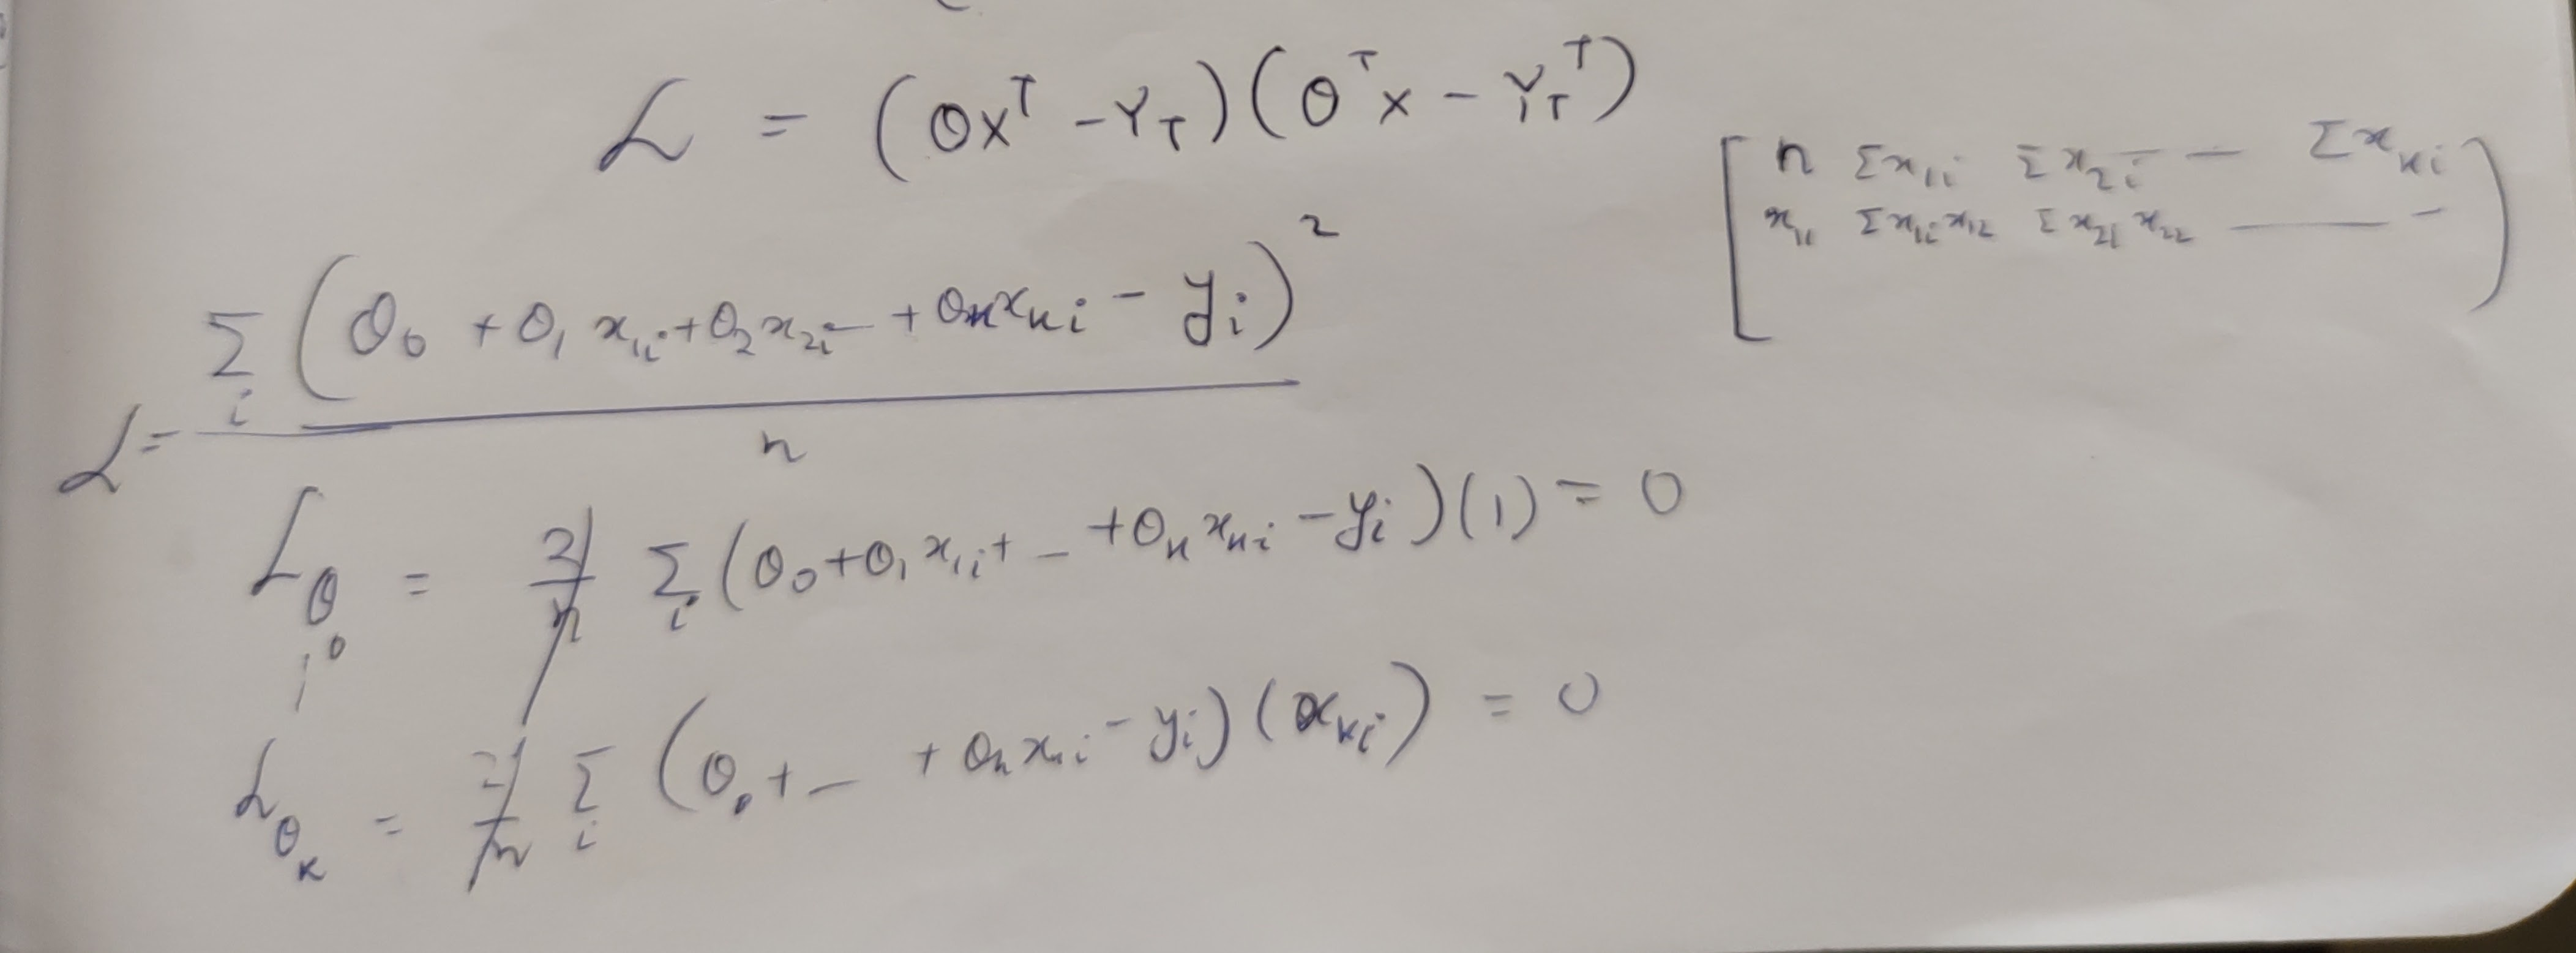

The $row-val$ function outputs the coefficients of the $Theta_i$ for i ∈ \{0, 1, ..., k\} in the $ℒ_Θi$ as a row array.

In [5]:
def row_val(X, t, n, k, row):
  for i in range(k+1):
    sum = 0
    for j in range(n):
      sum += X[i][j]*X[t][j]
    row.append(sum)

In [6]:
def coeff(X, n, k, Alpha):
  for i in range(k+1):
    row = []
    row_val(X.T, i, n, k, row)
    Alpha.append(row)

In [7]:
def targs(X, Y, n, k, Target):
  for i in range(k+1):
    sum = 0
    for j in range(n):
      sum += (Y[j])*(X[i][j])
    Target.append(sum)

Your usual co-factor matrix to help the $Det$ function.

In [8]:
def cof(A, B, n, t):
  for i in range(n):
    row = []
    for j in range(n):
      if i!=t or j!=t:
        row.append(A[i][j])
    B.append(row)

Your usual determinant to help the $Sys-solver$ function.

In [9]:
def Det(A, n):
  if n==1:
    return A[0][0]
  if n==2:
    return A[0][0]*A[1][1] - A[1][0]*A[0][1]
  else:
    sum = 0
    for i in range(n):
      B = []
      cof(A, B, n, i)
      sum += ((-1)**(i))*Det(B, n-1)
    return sum

In Cramer's method, the i-th unknown variable (if determinable) is given by replacing i-th column by the target vector (here $B$ vector). Then $Soln_i$ = $Det(Assist_i)/Det(Alpha)$. Alpha is the matrix of coefficients and Assist is the column replaced matrix Alpha. 

In [10]:
def Assist(A, n, B, t, assist):
  for i in range(n):
    row = []
    for j in range(n):
      if j == t:
        row.append(B[i])
      else:
        row.append(A[i][j])
    assist.append(row)

In [11]:
def Sys_solver(A, B, Soln, n):
  det = Det(A, n)
  print("Det is ", det)
  if det !=0:
    for i in range(n):
      assist = []
      Assist(A, n, B, i, assist)
      #print("Assist ", i+1, " is: ")
      #print(assist)
      Soln[i] = Det(assist, n) / det

We solve the solution A**x** = B to get the optimal vector (here **x** is **Soln** which we initialize to **0**). We employ Cramer's method of solution determination. 

Notice here that, in $X$ we have 1's in every rows of the matrix. This is due to the following reason:

$y_p$(predicted y) = $a_0 + a_1*x_1 + a_2*x_2 + ... + a_k*x_k$. So every feature row of $X$ has the coefficients $(1, x_1, x_2, ... , x_k)$. Hence the 1 at the beginning.

You may try to match the weights generated by this algorithm to the case of linear regression. For ease of usage, you may use [Linear regression Calculator](https://www.graphpad.com/quickcalcs/linear1/).

In [12]:
X = [[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3], [1, 5, 3], [1, 6, 4], [1, 7, 4], [1, 8, 5], [1, 9, 5], [1, 10, 6]]
Y = [10, 11, 16, 22, 24, 31, 35, 44, 48, 59]
Theta = []
n = 10 #int(input("Enter number of samples: "))
k = 2 #int(input("Input feature length: "))
#input_feature(n, k, X)
#input_target(n, Y)
#theta(k, Theta)
X = np.array(X)
Y = np.array(Y)
print(X)
Alpha = []
coeff(X, n, k, Alpha)
print("A is ", Alpha)
Target = []
targs(X.T, Y, n, k, Target)
print("B is ", Target)
print("We solve Ax = B to determine x: ")
Soln = [0 for i in range(k+1)]
Sys_solver(Alpha, Target, Soln, k+1)
print("The optimal weights is (x): ", Soln)

[[ 1  1  1]
 [ 1  2  1]
 [ 1  3  2]
 [ 1  4  3]
 [ 1  5  3]
 [ 1  6  4]
 [ 1  7  4]
 [ 1  8  5]
 [ 1  9  5]
 [ 1 10  6]]
A is  [[10, 55, 34], [55, 385, 233], [34, 233, 142]]
B is  [300, 2093, 1269]
We solve Ax = B to determine x: 
Det is  20825
The optimal weights is (x):  [-0.21066026410564226, 30.954621848739496, -0.5956782713085234]


One may argue what if the determinant is $0$, then this method fails. However, remind you that is the determinant is zero, then the nullspace of $Alpha$ is non-trivial. It means that it is also degenerate and hence, the normal equations generated would be degenerate with respect to $Theta$. Hence, do reframe the problem statement as the features would not be independent sets of data.